In [33]:
# Import necessary packages
import os
import urllib.request
import wfdb
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
import datetime 

import numpy as np
from scipy.signal import butter, filtfilt, lfilter
import scipy.io


In [34]:

record = wfdb.rdrecord(r'C:\Users\Fawad4Real\Desktop\FinalProject\MITBIH_Normal/16273') #16272.....16265
myarray =record.__dict__['p_signal']
record_name =record.__dict__['record_name']
Ecg1=myarray[:,0]
Ecg2=myarray[:,1]
time=record.__dict__['sig_len']/record.__dict__['fs']
record.__dict__

{'record_name': '16273',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 11354112,
 'base_time': datetime.time(8, 0),
 'base_date': None,
 'comments': ['28 F'],
 'sig_name': [None, None],
 'p_signal': array([[-0.305, -0.165],
        [-0.265, -0.145],
        [-0.245, -0.155],
        ...,
        [ 0.01 , -0.055],
        [ 0.01 , -0.065],
        [ 0.01 , -0.055]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['16273.dat', '16273.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-61, -33],
 'checksum': [-28135, -342],
 'block_size': [0, 0]}

In [35]:
timeperiod=record.__dict__['base_time']
print("time =",record.__dict__['base_time'])


time = 08:00:00


In [73]:
base = record.__dict__['baseline']
gain = record.__dict__['adc_gain']
base=base[:1]
gain=gain[:1]
signal=(Ecg1-base)/gain
signal=signal[10000:9000000]
sampling_rate = 200
signal_lenth=len(signal)
sets=int(signal_lenth/sampling_rate)     #total datasets  (signal total length/samples per set)
dataset=np.zeros((sets,sampling_rate)) #making dataset tobe filled later  (rows,columns)
print(f"(signal_lenth/sampling_rate)=sets\n {signal_lenth}     / \t {sampling_rate}   \t ={sets}")

(signal_lenth/sampling_rate)=sets
 8990000     / 	 200   	 =44950


9000000


<Figure size 432x288 with 0 Axes>

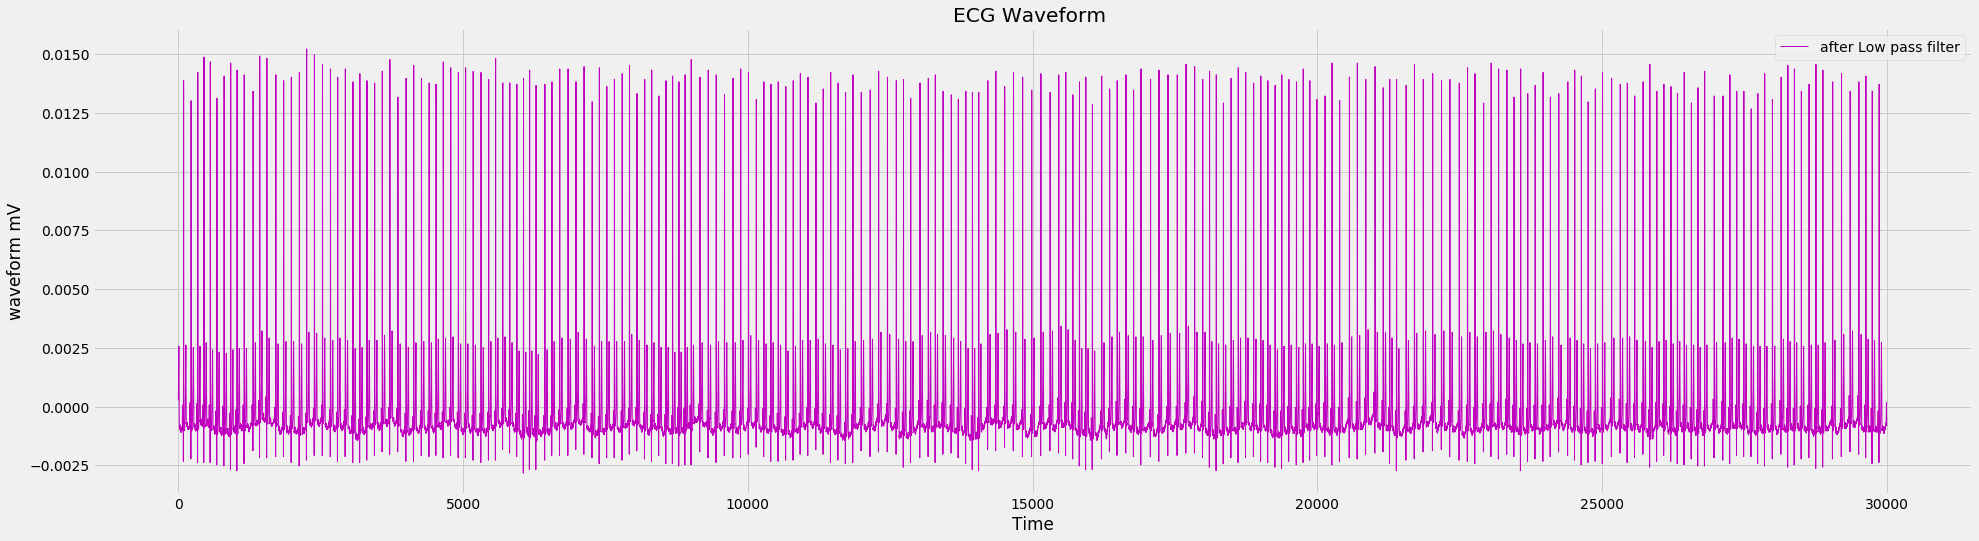

In [72]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure()
ind=9000000

#15910
fig, ax = plt.subplots(figsize=(30,8))
ax.plot(signal[ind:ind+30000], color='m' ,linewidth=1, label='after Low pass filter' , marker='None')
ax.set(ylabel="waveform mV",xlabel="Time",title="ECG Waveform ")
plt.legend(loc="best")
print(ind)
plt.show()

In [87]:
base = record.__dict__['baseline']
gain = record.__dict__['adc_gain']
base=base[:1]
gain=gain[:1]
signal=(Ecg1-base)/gain
signal=signal
sampling_rate = 200
signal_lenth=len(signal)
sets=int(signal_lenth/sampling_rate)     #total datasets  (signal total length/samples per set)
dataset=np.zeros((sets,sampling_rate)) #making dataset tobe filled later  (rows,columns)
print(f"(signal_lenth/sampling_rate)=sets\n {signal_lenth}     / \t {sampling_rate}   \t ={sets}")


(signal_lenth/sampling_rate)=sets
 2994500     / 	 200   	 =14972


2000000


<Figure size 432x288 with 0 Axes>

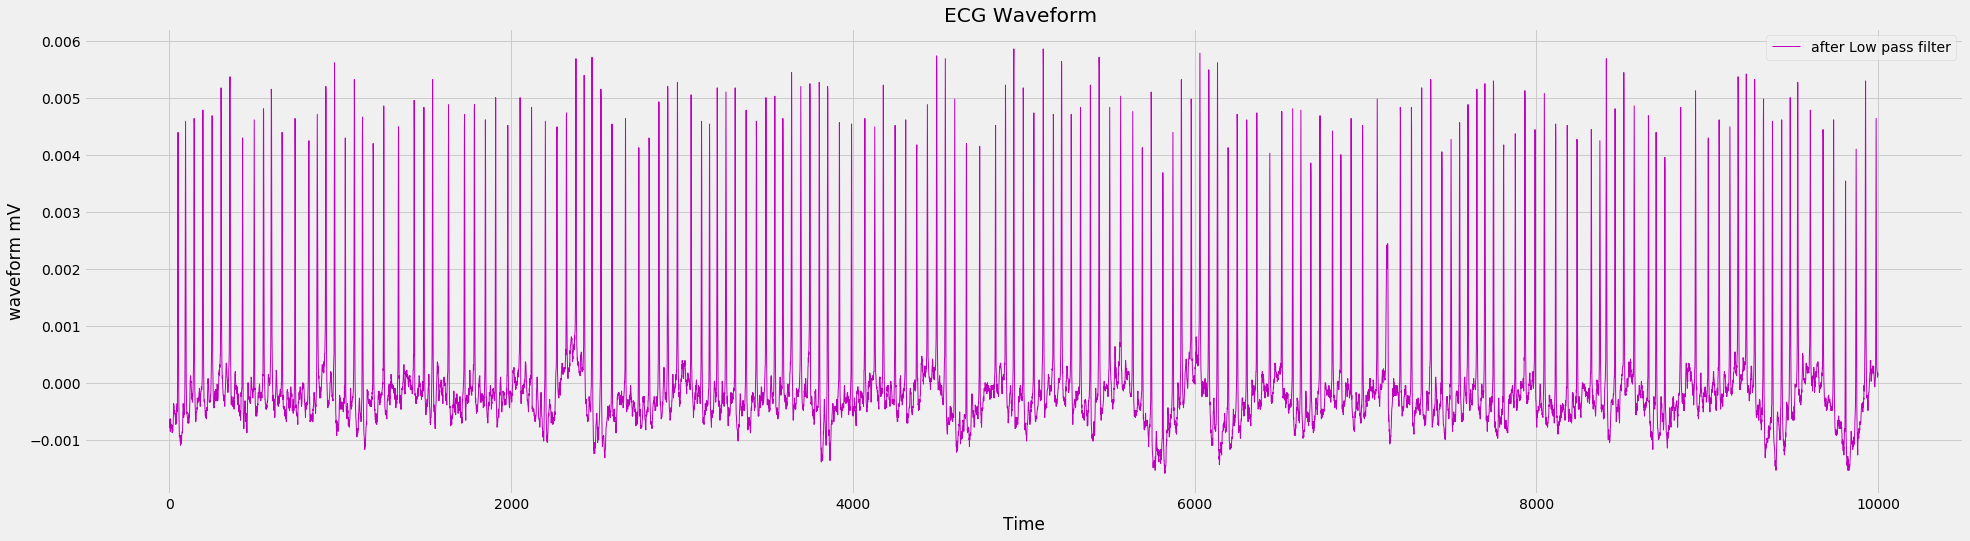

In [88]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure()
ind=2000000 #0 to  450000 #470000-2000000 

#15910
fig, ax = plt.subplots(figsize=(30,8))
ax.plot(signal[ind:ind+10000], color='m' ,linewidth=1, label='after Low pass filter' , marker='None')
ax.set(ylabel="waveform mV",xlabel="Time",title="ECG Waveform ")
plt.legend(loc="best")
print(ind)
plt.show()

##### 

In [74]:

index=0;
for r in range(0,sets):
        signal1=signal[index:index+sampling_rate]
        index+=sampling_rate;

        # 1 ) Substract the mean
        miu = np.mean(signal1) # mean of the signal
        signal1 -= miu

        # 2 ) Moving average for high order noises
        step2Param=3;
        signal2 = np.convolve(signal1,np.ones(step2Param)/(step2Param*1.0)) # equalant to Moving filter

        # 3)applying Highpass Butter filter
        Fs=record.__dict__['fs']; #sampling Frequency
        highPassFc=1  #Hz
        Fnyq = 0.5*Fs # nyquist frequency 

        b, a = butter(1, highPassFc/ Fnyq , btype='highpass')# definition of the high pass filter

        signal3 = lfilter(b, a, signal2)

        # 4 ) Low pass filter for high frequency suppression

        lowPassFc=30
        b,a = butter(12,lowPassFc/Fnyq)# definition of the high pass filter

        signal4 = lfilter(b, a, signal3)
        signal4=signal4[:sampling_rate]

        innerindex=1
        for c  in range(0,sampling_rate):
            dataset[r][c]=signal4[innerindex-1:innerindex]
            innerindex+=1



     
    

In [75]:
df=pd.DataFrame(dataset)
df['Lable']=0


In [76]:
df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Lable
0,-5.972338e-08,-8.539145e-07,-5.679848e-06,-0.000023,-0.000065,-0.000127,-0.000178,-0.000164,-0.000063,0.000081,...,3.198658e-04,2.673322e-04,7.867969e-05,-0.000156,-0.000332,-0.000406,-0.000413,-0.000408,-0.000404,0
1,-2.586679e-07,-3.802410e-06,-2.624113e-05,-0.000113,-0.000337,-0.000740,-0.001235,-0.001597,-0.001643,-0.001436,...,-2.745402e-06,-9.019945e-06,-3.986031e-05,-0.000075,-0.000086,-0.000084,-0.000101,-0.000153,-0.000226,0
2,2.515427e-07,3.745705e-06,2.617660e-05,0.000114,0.000345,0.000769,0.001309,0.001742,0.001869,0.001710,...,-8.394407e-04,-7.027665e-04,-6.127434e-04,-0.000689,-0.000905,-0.000925,-0.000009,0.002647,0.006912,0
3,-3.413679e-07,-5.010093e-06,-3.451058e-05,-0.000148,-0.000441,-0.000967,-0.001609,-0.002075,-0.002123,-0.001826,...,-1.378462e-03,-1.237810e-03,-1.010678e-03,-0.000934,-0.000947,-0.000821,-0.000547,-0.000316,-0.000212,0
4,-3.514553e-08,-5.086324e-07,-3.462654e-06,-0.000015,-0.000044,-0.000097,-0.000168,-0.000237,-0.000294,-0.000352,...,-3.376667e-04,-3.432920e-04,-3.269788e-04,-0.000286,-0.000222,-0.000152,-0.000096,-0.000060,-0.000039,0
5,-6.828960e-08,-1.003855e-06,-6.941687e-06,-0.000030,-0.000090,-0.000202,-0.000346,-0.000464,-0.000502,-0.000460,...,-1.197657e-04,-1.305365e-04,-1.601415e-04,-0.000189,-0.000184,-0.000136,-0.000048,0.000097,0.000320,0
6,-1.929401e-08,-2.996331e-07,-2.264149e-06,-0.000011,-0.000041,-0.000116,-0.000270,-0.000518,-0.000820,-0.001072,...,-5.153598e-04,-5.991404e-04,-6.610035e-04,-0.000045,0.002127,0.005992,0.009985,0.011285,0.008167,0
7,-1.531913e-07,-2.251907e-06,-1.552007e-05,-0.000066,-0.000197,-0.000430,-0.000706,-0.000890,-0.000874,-0.000707,...,-1.201874e-03,-1.236590e-03,-1.252113e-03,-0.001083,-0.000894,-0.000822,-0.000763,-0.000601,-0.000398,0
8,-1.765282e-08,-2.354785e-07,-1.437227e-06,-0.000005,-0.000013,-0.000020,-0.000020,-0.000012,-0.000015,-0.000063,...,-1.950194e-04,-2.083797e-04,-2.048064e-04,-0.000208,-0.000187,-0.000106,0.000006,0.000076,0.000080,0
9,1.264919e-08,1.779369e-07,1.157142e-06,0.000005,0.000012,0.000021,0.000020,-0.000005,-0.000055,-0.000112,...,-2.829144e-04,-2.749479e-04,-2.617956e-04,-0.000255,-0.000254,-0.000252,-0.000246,-0.000238,-0.000223,0


In [77]:

df.to_csv(fr'C:\Users\Fawad4Real\Desktop\FinalProject\Datasets\NORMAL\Dataset_{record_name}_sets_{sets}.csv')

In [ ]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure()

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(df.iloc[:,16930+int(3500/200)], color='m' ,linewidth=1, label='after Low pass filter' , marker='None')
ax.set(ylabel="waveform mV",xlabel="Time",title="ECG Waveform ")
plt.legend()

plt.show()

In [516]:
variable = pd.read_csv(fr"Datasets\NORMAL\Dataset_16265_sets_2500.csv")
df=pd.DataFrame(variable)
df.iloc(0:2498)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,-8.886454e-08,-1.017539e-07,-7.889730e-08,0.000002,-1.084788e-07,0.000001,-2.577872e-08,-4.711422e-07,-2.361715e-09,...,1.090792e-07,-2.794029e-08,-9.731067e-08,-1.204074e-07,-1.217284e-07,-7.009091e-08,-1.705238e-08,-1.931002e-07,-1.242502e-07,-6.212512e-08
1,1,-1.298300e-06,-1.479768e-06,-1.191811e-06,0.000033,-1.594635e-06,0.000019,-3.949581e-07,-7.013841e-06,-4.272296e-08,...,3.164595e-06,-3.867041e-07,-1.406447e-06,-1.777992e-06,-1.797410e-06,-1.070363e-06,-2.106405e-07,-2.822556e-06,-1.802458e-06,-9.212433e-07
2,2,-8.926647e-06,-1.007612e-05,-8.424175e-06,0.000226,-1.098550e-05,0.000120,-2.825734e-06,-4.838751e-05,-3.732132e-07,...,3.476358e-05,-2.472538e-06,-9.515828e-06,-1.232095e-05,-1.243090e-05,-7.696783e-06,-1.180992e-06,-1.934013e-05,-1.223993e-05,-6.378153e-06
3,3,-3.835503e-05,-4.255821e-05,-3.692244e-05,0.000950,-4.699212e-05,0.000459,-1.250185e-05,-2.026544e-04,-2.075490e-06,...,2.167155e-04,-9.610684e-06,-3.993757e-05,-5.313902e-05,-5.332103e-05,-3.455847e-05,-3.968792e-06,-8.231889e-05,-5.155634e-05,-2.726237e-05
4,4,-1.152956e-04,-1.248160e-04,-1.120495e-04,0.002731,-1.392619e-04,0.001175,-3.817037e-05,-5.610137e-04,-8.225076e-06,...,8.948337e-04,-2.500917e-05,-1.160883e-04,-1.594072e-04,-1.581069e-04,-1.082372e-04,-9.050270e-06,-2.429214e-04,-1.503635e-04,-7.999829e-05
5,5,-2.571802e-04,-2.718755e-04,-2.489839e-04,0.005612,-3.016225e-04,0.002057,-8.501039e-05,-1.015849e-03,-2.474630e-05,...,2.641303e-03,-4.463911e-05,-2.470910e-04,-3.518916e-04,-3.412395e-04,-2.499745e-04,-1.607446e-05,-5.247179e-04,-3.208281e-04,-1.689422e-04
6,6,-4.407350e-04,-4.696236e-04,-4.184477e-04,0.008265,-4.900209e-04,0.002343,-1.426568e-04,-9.525621e-04,-5.881270e-05,...,5.798106e-03,-5.152639e-05,-3.977077e-04,-5.898421e-04,-5.479156e-04,-4.384342e-04,-2.866520e-05,-8.530688e-04,-5.163660e-04,-2.599295e-04
7,7,-5.935851e-04,-7.050900e-04,-5.454379e-04,0.008281,-6.026912e-04,0.001274,-1.853070e-04,6.694713e-04,-1.129374e-04,...,9.610256e-03,-2.449899e-05,-4.966572e-04,-7.661890e-04,-6.533898e-04,-5.927560e-04,-6.140292e-05,-1.058089e-03,-6.408169e-04,-2.833680e-04
8,8,-6.398918e-04,-1.006157e-03,-5.734258e-04,0.004410,-5.623993e-04,-0.000830,-1.952087e-04,4.395186e-03,-1.762182e-04,...,1.190434e-02,3.998803e-05,-5.025259e-04,-7.951087e-04,-5.601970e-04,-6.239373e-04,-1.328426e-04,-1.012779e-03,-6.353907e-04,-1.912096e-04
9,9,-5.638469e-04,-1.307982e-03,-5.322184e-04,-0.001300,-4.103748e-04,-0.002441,-1.859842e-04,9.069711e-03,-2.203426e-04,...,1.039887e-02,1.182041e-04,-4.576660e-04,-7.330770e-04,-3.118397e-04,-5.259572e-04,-2.386616e-04,-7.802328e-04,-5.536398e-04,-1.704403e-05


In [517]:

df['Lable']=0
df=df.iloc[:,1:]
df.to_csv(fr'Datasets\NORMAL\Dataset_16265_sets_2500.csv')



In [143]:
variable = pd.read_csv(fr"Datasets\VF\Dataset_418_sets_2625.csv")

df=pd.DataFrame(variable)
df=df.iloc[:,1:]
#df=df.iloc[:,:-1]
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Lable
0,-3.237869e-10,-6.876113e-09,-7.149320e-08,-4.856942e-07,-0.000002,-0.000010,-0.000031,-0.000083,-0.000193,-0.000394,...,0.002098,0.002121,0.002118,0.002111,0.002124,0.002173,0.002253,0.002340,0.002407,2
1,6.174944e-10,1.246987e-08,1.232952e-07,7.966931e-07,0.000004,0.000014,0.000043,0.000112,0.000248,0.000481,...,-0.000056,0.000334,0.000700,0.001047,0.001381,0.001700,0.001987,0.002222,0.002386,2
2,5.592542e-10,1.136125e-08,1.130622e-07,7.357617e-07,0.000004,0.000013,0.000041,0.000107,0.000241,0.000474,...,0.001031,0.001061,0.001068,0.001069,0.001084,0.001124,0.001184,0.001249,0.001298,2


In [132]:
df=df.T
df.shape


(201, 2625)

In [128]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,-8.886454e-08,-1.017539e-07,-7.889730e-08,0.000002,-1.084788e-07,0.000001,-2.577872e-08,-4.711422e-07,-2.361715e-09,-6.708072e-07,...,1.090792e-07,-2.794029e-08,-9.731067e-08,-1.204074e-07,-1.217284e-07,-7.009091e-08,-1.705238e-08,-1.931002e-07,-1.242502e-07,-6.212512e-08
1,-1.298300e-06,-1.479768e-06,-1.191811e-06,0.000033,-1.594635e-06,0.000019,-3.949581e-07,-7.013841e-06,-4.272296e-08,-9.476568e-06,...,3.164595e-06,-3.867041e-07,-1.406447e-06,-1.777992e-06,-1.797410e-06,-1.070363e-06,-2.106405e-07,-2.822556e-06,-1.802458e-06,-9.212433e-07
2,-8.926647e-06,-1.007612e-05,-8.424175e-06,0.000226,-1.098550e-05,0.000120,-2.825734e-06,-4.838751e-05,-3.732132e-07,-6.106090e-05,...,3.476358e-05,-2.472538e-06,-9.515828e-06,-1.232095e-05,-1.243090e-05,-7.696783e-06,-1.180992e-06,-1.934013e-05,-1.223993e-05,-6.378153e-06


In [123]:
df['Lable']='0'
df

In [124]:
df.shape

(2500, 201)

In [125]:

df.to_csv(fr'C:\Users\Fawad4Real\Desktop\FinalProject\Datasets\NORMAL\Dataset_16265_sets_2500.csv')

In [146]:
df.iloc[0:1,:-1]


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-3.237869e-10,-6.876113e-09,-7.149320e-08,-4.856942e-07,-0.000002,-0.00001,-0.000031,-0.000083,-0.000193,-0.000394,...,0.002042,0.002098,0.002121,0.002118,0.002111,0.002124,0.002173,0.002253,0.00234,0.002407


<Figure size 432x288 with 0 Axes>

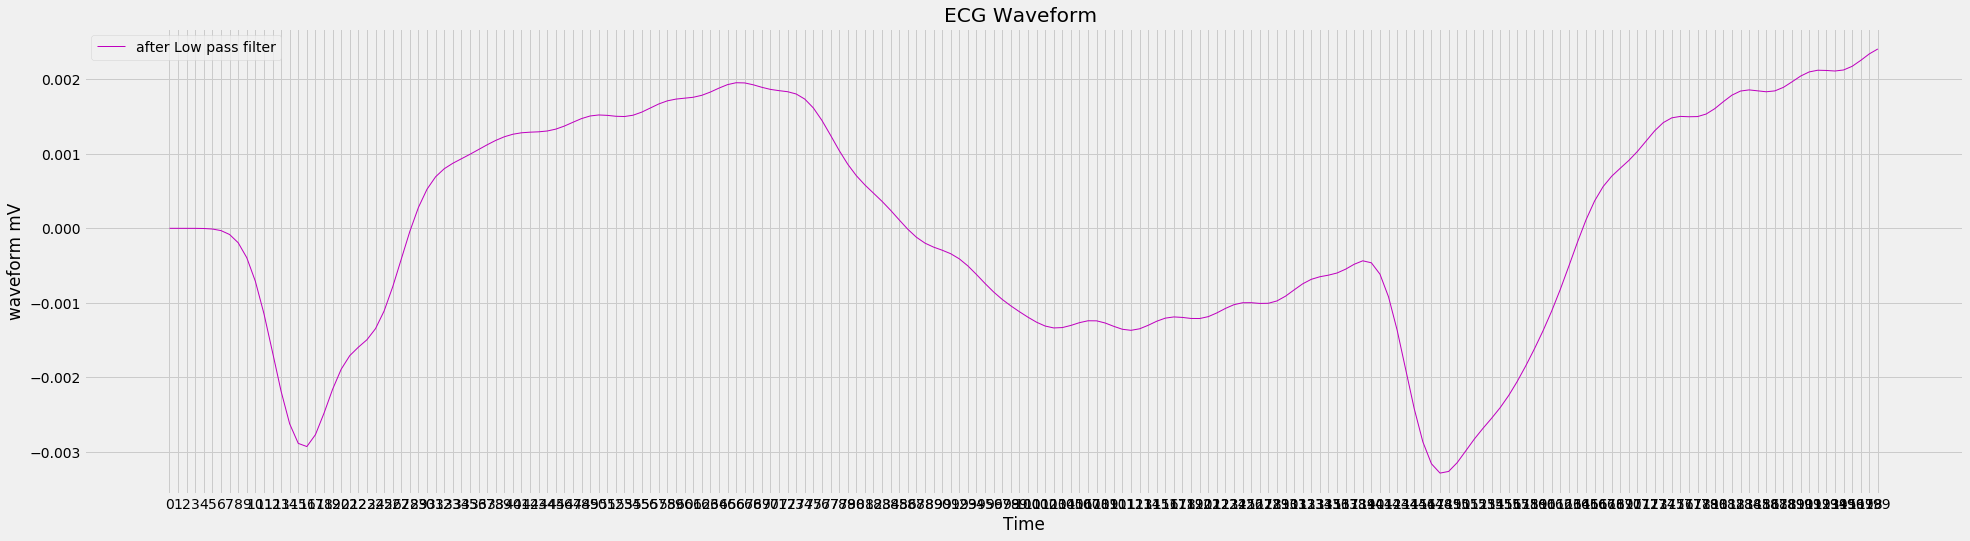

In [148]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure()


fig, ax = plt.subplots(figsize=(30,8))
ax.plot(df.iloc[0:1,:-1].T, color='m' ,linewidth=1, label='after Low pass filter' , marker='None')
ax.set(ylabel="waveform mV",xlabel="Time",title="ECG Waveform ")
plt.legend(loc="best")
plt.show()

In [543]:
df.reindex(np.random.permutation(df.index))

-8.886454042226639e-08


In [172]:
variable = pd.read_csv(fr"Datasets\VF\Dataset_418_sets_2625.csv")

VF_DF=pd.DataFrame(variable)

variable = pd.read_csv(fr"Datasets\NORMAL\Dataset_16265_sets_1149.csv")

AF_DF=pd.DataFrame(variable)

In [173]:
print(VF_DF.shape)
print(AF_DF.shape)

(2625, 202)
(1149, 202)


In [174]:
df_row = pd.concat([VF_DF, AF_DF],ignore_index=True)

df_row.shape

(3774, 202)

In [183]:
df_row=df_row.sample(frac=1)
df_row.shape

(3774, 202)

In [184]:
df_row

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,Lable
2108,2108,6.915170e-10,1.395926e-08,1.379328e-07,8.904688e-07,4.229588e-06,1.578018e-05,4.820528e-05,1.240771e-04,2.747590e-04,...,-0.001197,-0.001154,-0.001115,-0.001102,-0.001122,-0.001163,-0.001200,-0.001210,-0.001185,2
228,228,2.578103e-10,5.184127e-09,5.101766e-08,3.279524e-07,1.550623e-06,5.757007e-06,1.749481e-05,4.478148e-05,9.859249e-05,...,-0.003640,-0.003438,-0.003160,-0.002819,-0.002444,-0.002062,-0.001689,-0.001325,-0.000966,2
890,890,-3.063644e-12,-6.808805e-11,-7.187577e-10,-4.800952e-09,-2.277974e-08,-8.154197e-08,-2.274067e-07,-4.994071e-07,-8.476804e-07,...,0.001314,0.001458,0.001572,0.001652,0.001712,0.001772,0.001847,0.001945,0.002057,2
1210,1210,-4.296528e-10,-8.662280e-09,-8.544875e-08,-5.504385e-07,-2.607278e-06,-9.693957e-06,-2.948645e-05,-7.549380e-05,-1.660704e-04,...,-0.000855,-0.000918,-0.000970,-0.001035,-0.001129,-0.001253,-0.001390,-0.001515,-0.001605,2
2716,92,-4.895556e-08,-7.516685e-07,-5.507682e-06,-2.562822e-05,-8.493403e-05,-2.128175e-04,-4.169741e-04,-6.503775e-04,-8.139603e-04,...,-0.001176,-0.001094,-0.001002,-0.000825,-0.000663,-0.000574,-0.000493,-0.000391,-0.000352,0
2941,317,-1.487080e-07,-2.242044e-06,-1.580914e-05,-6.911703e-05,-2.099032e-04,-4.730356e-04,-8.367177e-04,-1.239088e-03,-1.624212e-03,...,-0.001948,-0.001285,-0.001225,-0.001416,-0.001311,-0.000992,-0.000810,-0.000757,-0.000604,0
2207,2207,5.905096e-10,1.188134e-08,1.169650e-07,7.519241e-07,3.554445e-06,1.318916e-05,4.003996e-05,1.023240e-04,2.247088e-04,...,-0.001053,-0.001077,-0.001156,-0.001319,-0.001575,-0.001907,-0.002275,-0.002633,-0.002940,2
2070,2070,-1.322009e-10,-2.664841e-09,-2.625850e-08,-1.687644e-07,-7.963418e-07,-2.943665e-06,-8.878621e-06,-2.246131e-05,-4.858393e-05,...,0.001001,0.000894,0.000802,0.000704,0.000584,0.000443,0.000296,0.000162,0.000058,2
3755,1131,-1.352582e-07,-1.924246e-06,-1.290399e-05,-5.410571e-05,-1.583872e-04,-3.414642e-04,-5.550586e-04,-6.799489e-04,-6.072524e-04,...,0.010534,0.004371,-0.001542,-0.004122,-0.003466,-0.001941,-0.001436,-0.001900,-0.002247,0
3388,764,-8.165931e-09,-1.040273e-07,-5.207353e-07,-8.881370e-07,3.427517e-06,2.715329e-05,9.251644e-05,2.051045e-04,3.221181e-04,...,-0.000153,-0.000024,-0.000020,-0.000080,-0.000070,0.000052,0.000197,0.000272,0.000291,0
